# Dataset ASAP - Exploração e Análise

Análise do dataset ASAP (Automated Student Assessment Prize) com 8 prompts diferentes e ~13k essays.

## Importar bibliotecas

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from src.data.dataset import ASAPDataset

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Carregar dataset ASAP

In [2]:
data_path = '../data/raw/training_set_rel3.tsv'
dataset = ASAPDataset(data_path)
df = dataset.load_data()

print(f"Total essays: {len(df)}")
print(f"Prompts: {sorted(df['essay_set'].unique())}")
df.head()

Loading ASAP dataset from ../data/raw/training_set_rel3.tsv
Loaded 12976 essays across 8 prompts
Total essays: 12976
Prompts: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]


,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


## Distribuição de essays por prompt

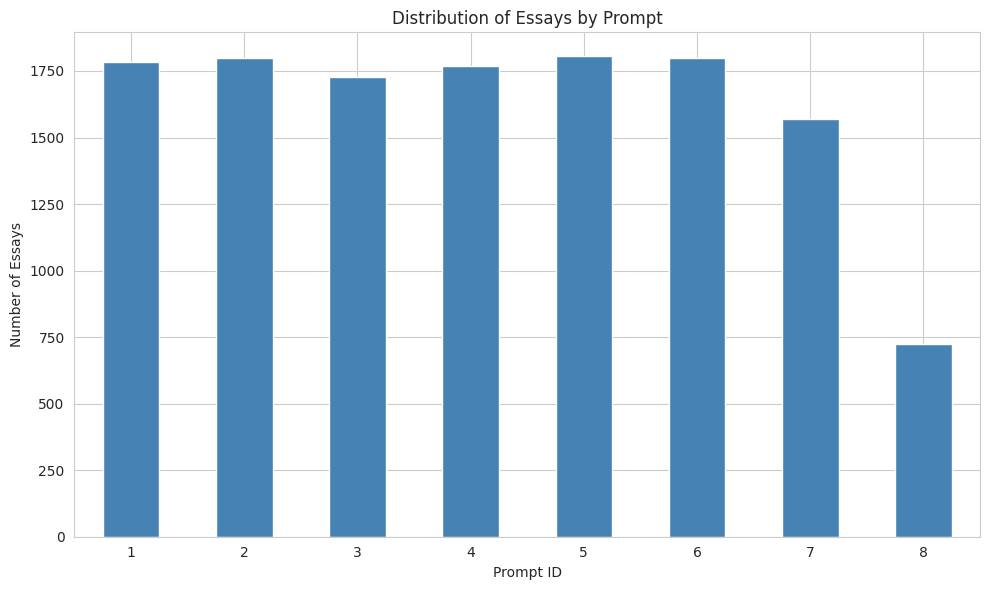

essay_set
1    1783
2    1800
3    1726
4    1770
5    1805
6    1800
7    1569
8     723
Name: count, dtype: int64


In [3]:
prompt_counts = df['essay_set'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
prompt_counts.plot(kind='bar', ax=ax, color='steelblue')
ax.set_xlabel('Prompt ID')
ax.set_ylabel('Number of Essays')
ax.set_title('Distribution of Essays by Prompt')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(prompt_counts)

## Score ranges por prompt

In [4]:
score_stats = []
for prompt_id in sorted(df['essay_set'].unique()):
    prompt_data = df[df['essay_set'] == prompt_id]['domain1_score']
    score_stats.append({
        'Prompt': prompt_id,
        'Min': prompt_data.min(),
        'Max': prompt_data.max(),
        'Mean': prompt_data.mean(),
        'Std': prompt_data.std(),
        'Count': len(prompt_data)
    })

stats_df = pd.DataFrame(score_stats)
stats_df

,Prompt,Min,Max,Mean,Std,Count
0,1,2,12,8.528323,1.538565,1783
1,2,1,6,3.415556,0.774512,1800
2,3,0,3,1.848204,0.815157,1726
3,4,0,3,1.432203,0.939782,1770
4,5,0,4,2.408864,0.970821,1805
5,6,0,4,2.720000,0.970630,1800
6,7,2,24,16.062460,4.585350,1569
7,8,10,60,36.950207,5.753502,723


## Distribuição de scores por prompt (boxplot)

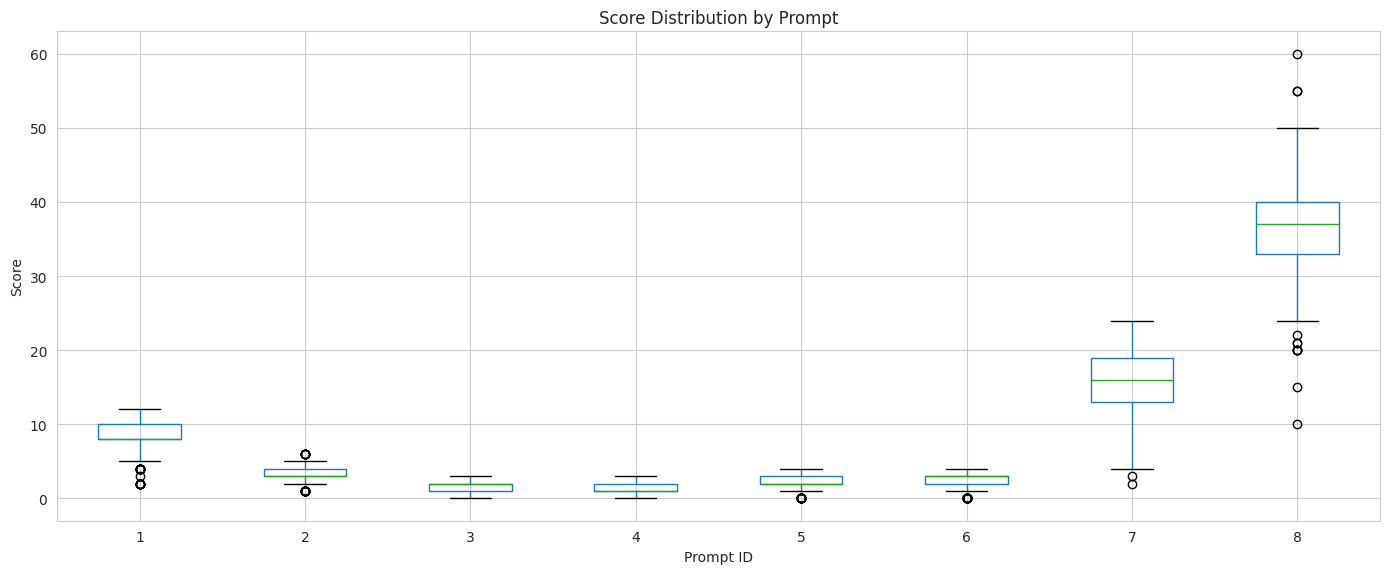

In [5]:
fig, ax = plt.subplots(figsize=(14, 6))
df.boxplot(column='domain1_score', by='essay_set', ax=ax)
ax.set_xlabel('Prompt ID')
ax.set_ylabel('Score')
ax.set_title('Score Distribution by Prompt')
plt.suptitle('')
plt.tight_layout()
plt.show()

## Normalização de scores para [0, 1]

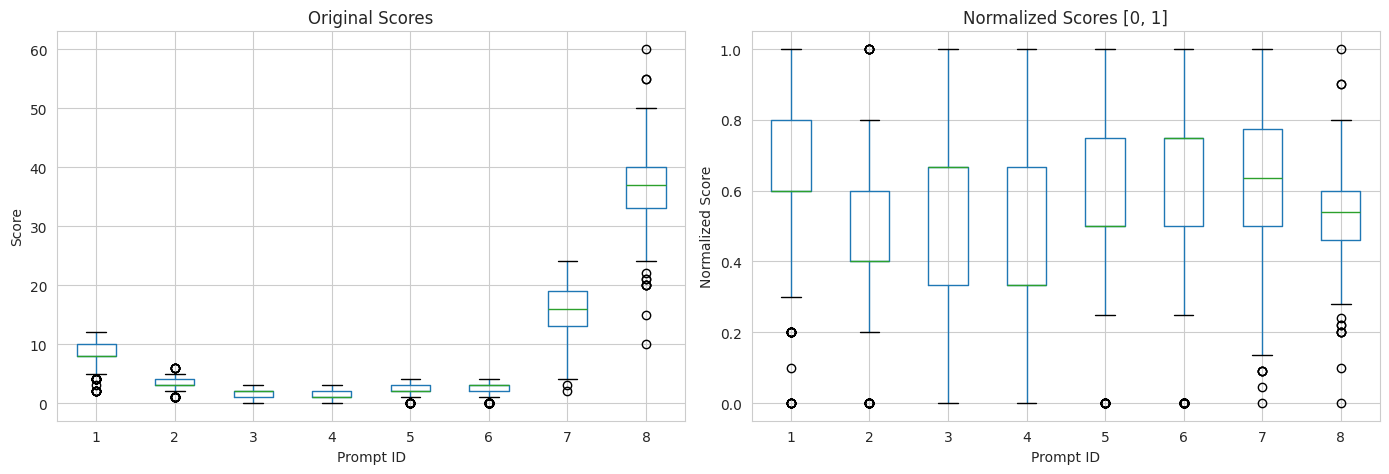

In [6]:
df['normalized_score'] = df.apply(
    lambda row: dataset.normalize_score(row['domain1_score'], row['essay_set']),
    axis=1
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df.boxplot(column='domain1_score', by='essay_set', ax=axes[0])
axes[0].set_title('Original Scores')
axes[0].set_xlabel('Prompt ID')
axes[0].set_ylabel('Score')

df.boxplot(column='normalized_score', by='essay_set', ax=axes[1])
axes[1].set_title('Normalized Scores [0, 1]')
axes[1].set_xlabel('Prompt ID')
axes[1].set_ylabel('Normalized Score')

plt.suptitle('')
plt.tight_layout()
plt.show()

## Estatísticas de tamanho dos essays

In [7]:
df['essay_length'] = df['essay'].apply(lambda x: len(str(x).split()))

length_stats = []
for prompt_id in sorted(df['essay_set'].unique()):
    prompt_lengths = df[df['essay_set'] == prompt_id]['essay_length']
    length_stats.append({
        'Prompt': prompt_id,
        'Min': prompt_lengths.min(),
        'Max': prompt_lengths.max(),
        'Mean': prompt_lengths.mean(),
        'Median': prompt_lengths.median()
    })

length_df = pd.DataFrame(length_stats)
length_df

,Prompt,Min,Max,Mean,Median
0,1,8,785,365.681436,365.0
1,2,31,1064,380.748333,368.0
2,3,10,375,108.687138,100.5
3,4,2,357,94.512994,87.0
4,5,4,416,122.132964,119.0
5,6,3,454,153.298333,153.0
6,7,5,592,168.203314,154.0
7,8,4,856,604.874136,626.0


## Distribuição de tamanho dos essays

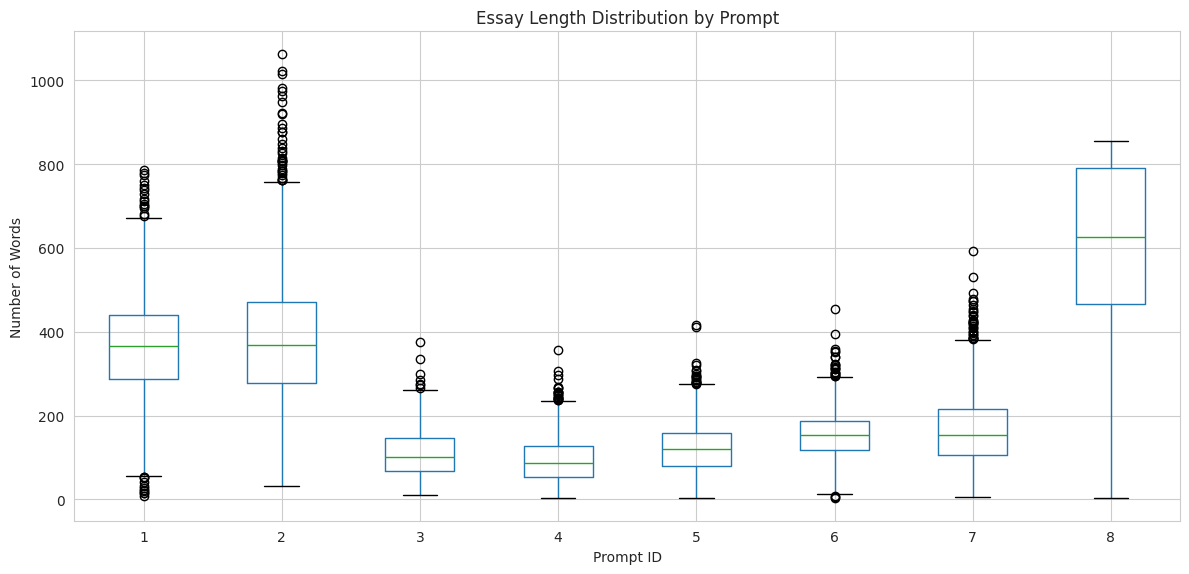

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
df.boxplot(column='essay_length', by='essay_set', ax=ax)
ax.set_xlabel('Prompt ID')
ax.set_ylabel('Number of Words')
ax.set_title('Essay Length Distribution by Prompt')
plt.suptitle('')
plt.tight_layout()
plt.show()

## Exemplo de essay por prompt

In [9]:
prompt_id = 2
example = df[df['essay_set'] == prompt_id].iloc[0]

print(f"Prompt: {prompt_id}")
print(f"Score: {example['domain1_score']}")
print(f"Normalized Score: {example['normalized_score']:.3f}")
print(f"Length: {example['essay_length']} words")
print(f"\nEssay:\n{example['essay'][:500]}...")

Prompt: 2
Score: 4
Normalized Score: 0.600
Length: 476 words

Essay:
Certain materials being removed from libraries such as books, music and magazines, shouldn't be removed from the libraries. It gives people a chance to understand how the real world @CAPS2.     Having certain materials such as books and music definitly should not be removed, because most books and music can show most people how bad the statement in the book @CAPS2 or how bad the lyrics are in a song, and help that person to avoid that type of thing that the book or song @CAPS2 saying to the read...


## Cross-prompt split: Train vs Test

In [10]:
test_prompt = 2
train_prompts = [p for p in df['essay_set'].unique() if p != test_prompt]

train_df = df[df['essay_set'].isin(train_prompts)]
test_df = df[df['essay_set'] == test_prompt]

print(f"Test Prompt: {test_prompt}")
print(f"Train Prompts: {sorted(train_prompts)}")
print(f"\nTrain essays: {len(train_df)}")
print(f"Test essays: {len(test_df)}")
print(f"\nTrain/Test ratio: {len(train_df)/len(test_df):.2f}")

Test Prompt: 2
Train Prompts: [np.int64(1), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]

Train essays: 11176
Test essays: 1800

Train/Test ratio: 6.21


## Resumo do dataset

- **Total de essays**: 12,976
- **Número de prompts**: 8
- **Score ranges**: Diferentes por prompt (1-6, 2-12, 0-3, etc.)
- **Normalização**: Todos os scores normalizados para [0, 1]
- **Cross-prompt**: Leave-one-out (treinar em 7, testar em 1)